# Introduction:

In this data set,
The rows represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices.

### ***We will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.***

---



# Data Set Overview:

## *Formatted: Feature -- Variable -- Value Type*

---


### Age -- age -- int(days)
### Height -- height -- int(cm)
### Weight -- weight -- float(kg)
### Gender -- gender -- categorical code
### Systolic Blood Pressure -- ap_hi -- int
### Diastolic blood pressure -- ap_lo -- int
### Cholesterol -- cholesterol -- 1: normal, 2: above normal, 3: well above normal
### Glucose -- gluc -- 1: normal, 2: above normal, 3: well above normal
### Smoking -- smoke -- binary
### Alcohol intake -- alco -- binary
### Physical Acitivity -- active -- binary
### Presence or absence of cardiovascular disease -- cardio -- binary

---



## Importing Necessary Libraries

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Reading the CSV file into DataFrame

In [95]:
df = pd.read_csv('/content/Medical_data.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [96]:
BMI = df['weight']/(df['height']/100)**2
df['overweight'] = BMI.apply(lambda x: 0 if x < 25 else 1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0




---


### We calculated the BMI of each individual and checked if they are overweight or not, the overweight and not overweight individuals were assigned the values of 1 and 0 respectively.

---





---

### Now we will normalize the data by using 0 for good and 1 for bad


---



In [97]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x ==1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x ==1 else 1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0




---

### Drawing Categorical Plot To Separate Data By Cardio.




---


### Creating a new dataframe for categorical plot by melting the original dataframe into long format so that the new dataframe can be used to categorize data.

---



In [98]:
df_cat = pd.melt(df, id_vars =['cardio'], value_vars = ['cholesterol', 'gluc' ,'smoke', 'alco', 'active', 'overweight'])
df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0




---

### Categorizing data by Cardio, Variable,and Value then converting the series formed after using groupby into a dataframe by using reset_index.

---



In [99]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name = 'count')
df_cat.head()

,cardio,variable,value,count
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330




---

### Here the output of using size() method is stored under 'count' column as passed in the reset_index parameter.

### And, now we rename that to 'total number' for clarity.


---



In [100]:
df_cat.rename(columns = {'count' : 'total number'} , inplace = True)



---

### Now, we draw a categorical plot seperated by cardio values into columns.



---



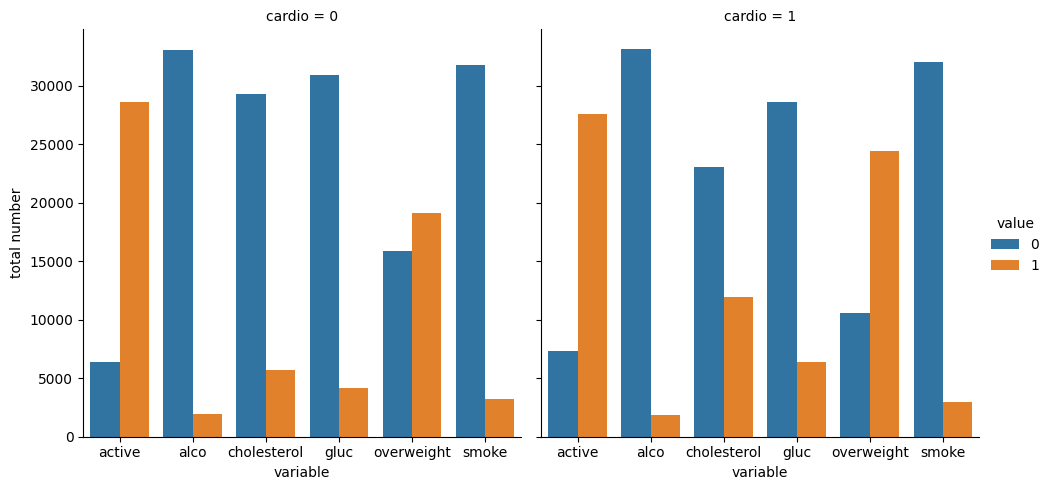

In [101]:
sns.catplot(data = df_cat, x = 'variable', y ='total number', hue = 'value', col = 'cardio', kind = 'bar')




---


## INSIGHTS:


---



#### Active:
* People with active lifestyle (active = 1) are more likely to belong to (cardio = 0) group. Conversely, poeple with more sedentary lifestyle ( active = 0) are more likely to belong to (cardio = 1) group.

#### Alcohol:
* There is little to no observable difference in alcohol consumption bwtween the "cardio= 0" and "cardio = 1" groups. Though, we can see that majority of people do not consume alcohol.

#### Cholesterol:

* High cholesterol seems to have strong association with cardiovascular disease, as increased cholesterol levels (cholesterol = 1) is more prevelant in "cardio = 1" group compared to the "cardio = 0" group.

#### Glucose:

* People with higher level of glucose (gluc = 1) are more prevalent in "cardio = 1" group.

#### Overweigth:

* It seems that being overweight has a directly proportional relation with having cardiovasculr disease, as overwight poeple (overweight = 1) are significantly more in "cardio = 1" group and peopel who are not overweight (overweight = 0) are somewhat more in "cardio = 0" group.

#### Smoke:

* Most of the people in both cardio groups do not smoke, but people who smoke (smoke = 1) are slightly more common in "cardio = 1" group.

---




## Drawing Correlation Heatmap




---


### Making df_heat variable and cleaning the data in it by filtering out the following patient segments that represent incorrect data:


*   diastolic pressure is higher than systoli
*   height is less than the 2.5th percentile
*  height is more than the 97.5th percentile
* weight is less than the 2.5th percentile
* weight is more than the 97.5th percentile


---




In [102]:
df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]



---


### Making a correlation matrik for the df_heat dataframe and a mask for lower triangle to use in the heatmap.

---



In [115]:
corr = df_heat.corr(method = "pearson")
mask = np.triu(corr)

In [116]:
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000592
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089380
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052423
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.148628
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.656261
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017322
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172314
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.128061
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088127
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003057




---

### Plotting the heatmap


---



<Axes: >

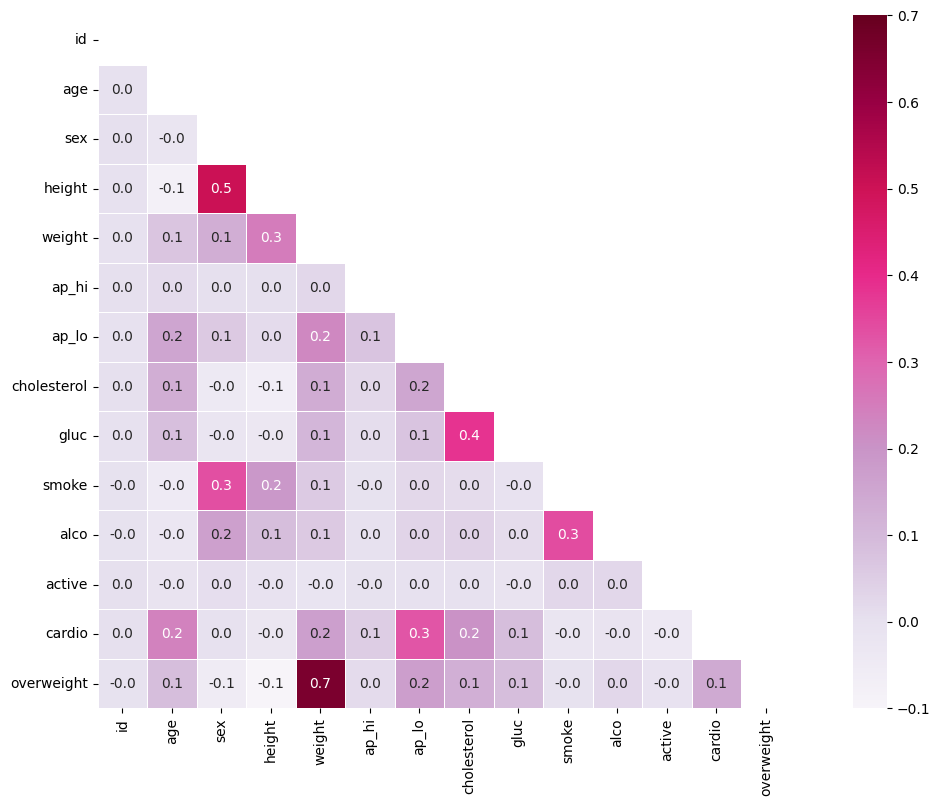

In [114]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.heatmap(corr, annot = True, fmt=".1f", linewidth = 0.5, mask = mask, square = True, ax = ax, vmin = -0.1, vmax = 0.7, cmap = 'PuRd')



---


## INSIGHTS:


---



#### Specific to Cardiovascular Disease:
* There seems to be a moderate correlation between high glucose level and elevated cholesterol level, both contributing to get cardiovascular disease.
* Diastolic pressure (ap_lo) is also seen as a factor which contributes in people getting cardiovascular disease.
* Age also seems to be a factor which determines people getting cardiovascular disease to some extent.
* Weight and elevated cholesterol level also show direct correlation with people getting cardiovascular diseases.

---




### Aditional Insights:
* Age and weight of a people are factors which affect the diastolic pressure (ap_lo) in people.
* There is moderate correlation between people who drink alcohol and people who smoke.
* Sex seems to be a determining factor when it comes to people who smoke.
* Height and sex have a high correlation.
---



---

